📦 Loading libraries...
✅ Libraries loaded successfully!

📂 Loading dataset...
✅ Dataset loaded from: C:\Users\Affan Laptops\Music\PROGRAMING AI\employee_productivity.csv
   Rows: 10
   Columns: 10

🔍 EXPLORING THE DATA

📋 First 5 rows of data:
  Employee_ID        Department  Experience_Years  Technical_Skill_Score  \
0        E001      Data Science                 5                     92   
1        E002  Machine Learning                 3                     89   
2        E003     Data Analysis                 2                     75   
3        E004  Data Engineering                 6                     95   
4        E005    BI & Analytics                 4                     82   

   Communication_Score  Training_Hours  Projects_Completed  \
0                   85             120                  18   
1                   78              90                  15   
2                   80              70                  10   
3                   88             150             

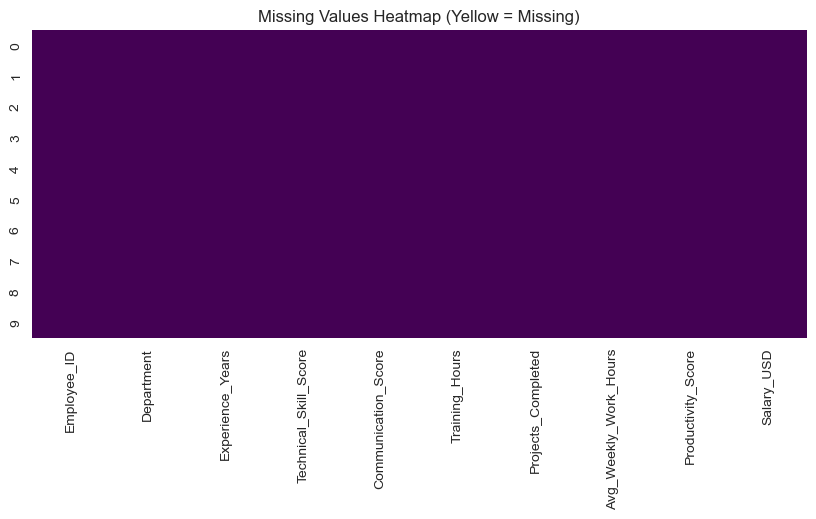


📊 IDENTIFYING COLUMN TYPES

🔢 Numerical columns (8):
   - Experience_Years
   - Technical_Skill_Score
   - Communication_Score
   - Training_Hours
   - Projects_Completed
   - Avg_Weekly_Work_Hours
   - Productivity_Score
   - Salary_USD

📝 Categorical columns (2):
   - Employee_ID
   - Department

📈 VISUALIZING NUMERICAL DATA


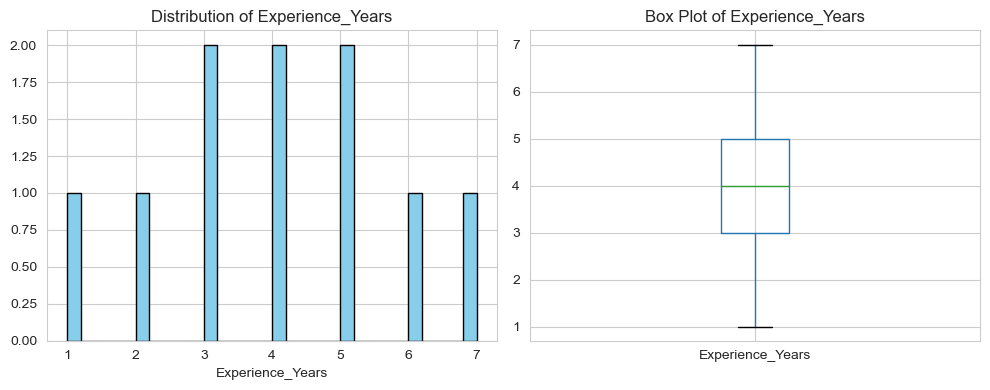

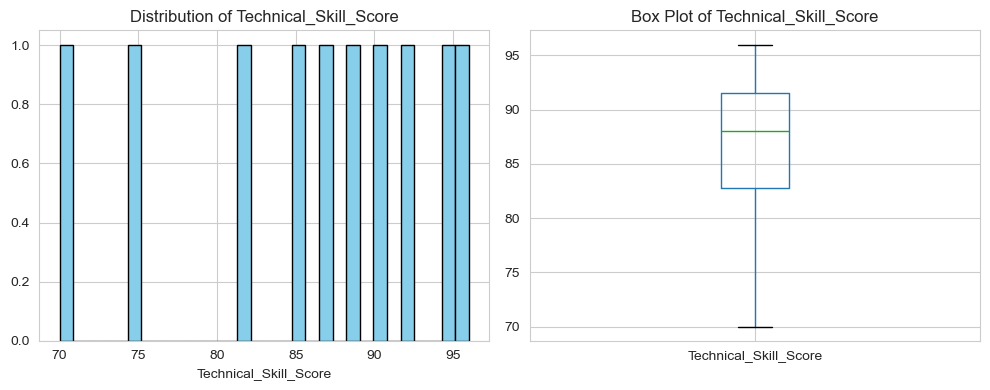

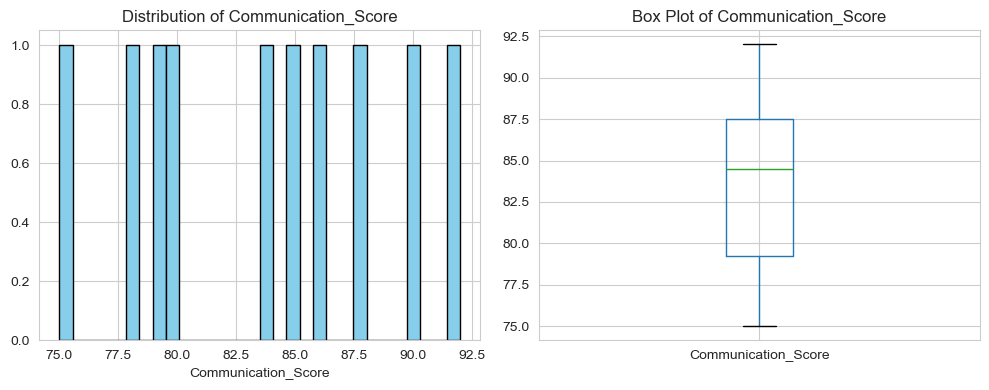


📊 VISUALIZING CATEGORICAL DATA

📌 Employee_ID - Value Counts:
Employee_ID
E001    1
E002    1
E003    1
E004    1
E005    1
E006    1
E007    1
E008    1
E009    1
E010    1
Name: count, dtype: int64


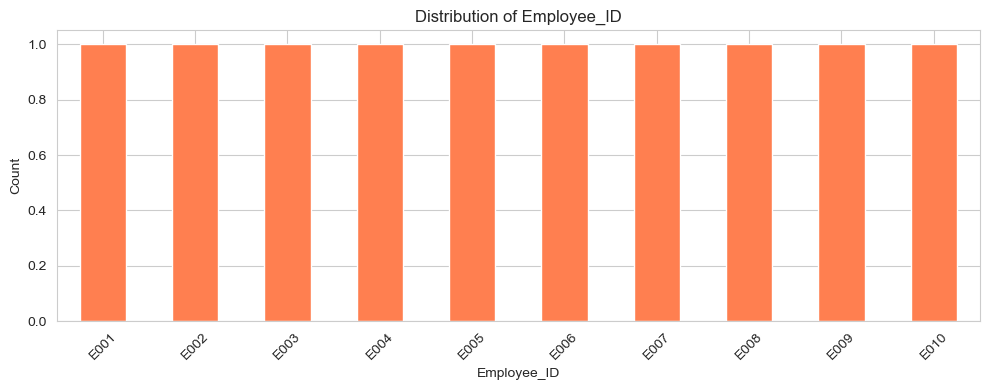


📌 Department - Value Counts:
Department
Data Science        3
Machine Learning    2
Data Engineering    2
BI & Analytics      2
Data Analysis       1
Name: count, dtype: int64


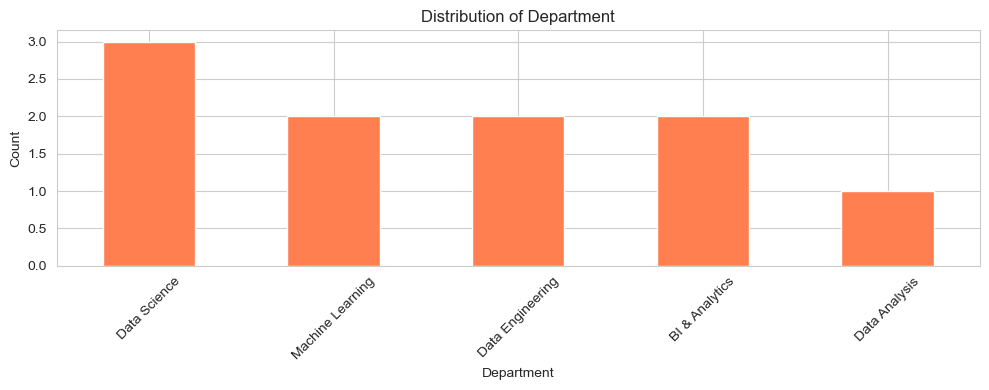


🔗 CORRELATION ANALYSIS


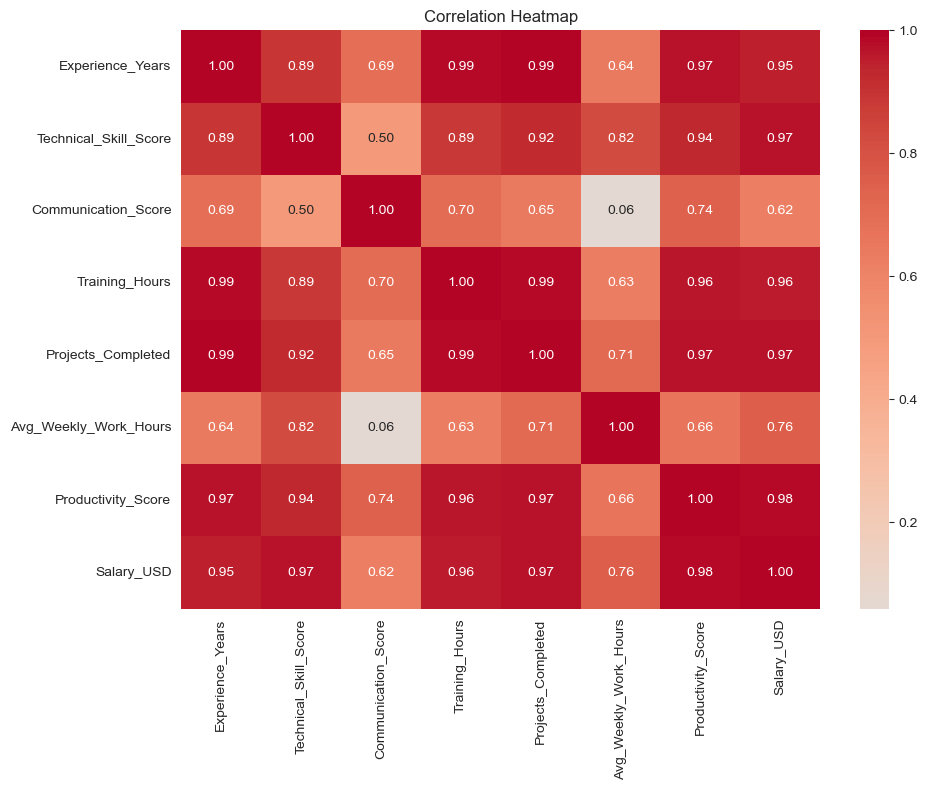

✅ High positive correlation (close to 1) = features move together
✅ High negative correlation (close to -1) = features move opposite

🔧 DATA PREPROCESSING

1️⃣ Handling missing values...
   Missing values remaining: 0

2️⃣ Encoding categorical variables...
   ✅ Encoded Employee_ID
   ✅ Encoded Department

3️⃣ Scaling numerical features...
   ✅ Scaled 8 features

✅ Preprocessing complete!

🤖 PREPARING FOR MACHINE LEARNING

🎯 Target variable: Department_encoded
   Task Type: CLASSIFICATION (5 classes)

📊 Data shapes:
   Features (X): (10, 9)
   Target (y): (10,)

📦 Data split:
   Training set: 8 samples
   Testing set: 2 samples

🚀 TRAINING MACHINE LEARNING MODEL

🔵 Training Random Forest Classifier...

✅ Model trained successfully!
   Accuracy: 0.00%

📋 Detailed Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       1.0
           2       0.00      0.00      0.00       0.0
           3       0.00      0.00      0.0

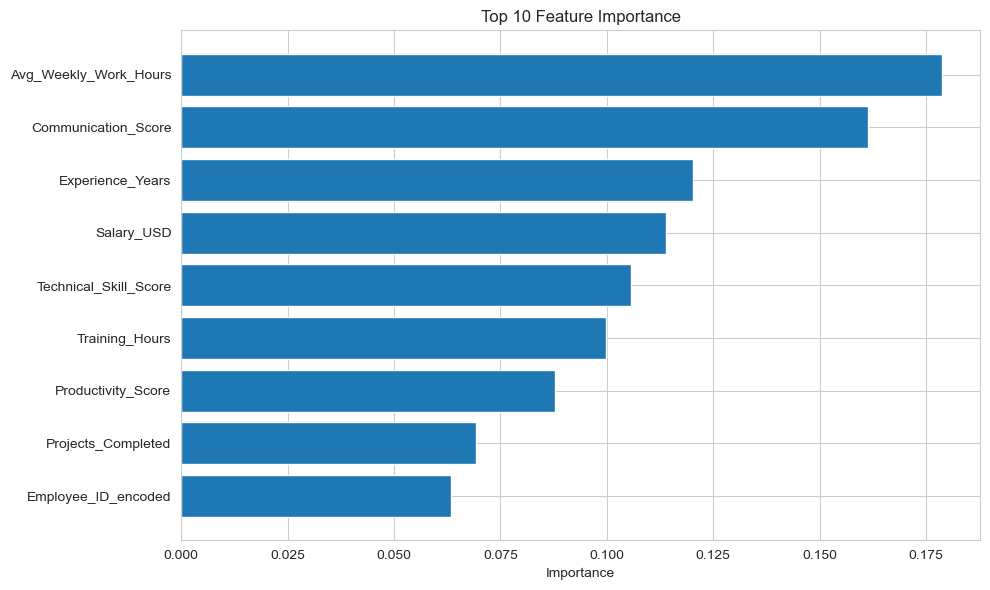


💾 SAVING THE MODEL
✅ Model saved as 'best_model.pkl'
✅ Scaler saved as 'scaler.pkl'
✅ Encoders saved as 'label_encoders.pkl'

🎉 PROJECT COMPLETE!

✅ What we did:
   1. Loaded and explored the data
   2. Visualized distributions and correlations
   3. Cleaned and preprocessed the data
   4. Trained a machine learning model
   5. Evaluated model performance
   6. Identified important features
   7. Saved the model for future use

✨ You can now use this model to make predictions!


In [3]:
# ==============================================================================
# EMPLOYEE PRODUCTIVITY ANALYSIS - SIMPLE VERSION
# Easy to understand code with clear explanations
# ==============================================================================

# STEP 1: IMPORT LIBRARIES
# ==============================================================================
print("📦 Loading libraries...")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import mean_squared_error, r2_score
import pickle

print("✅ Libraries loaded successfully!\n")

# ==============================================================================
# STEP 2: LOAD DATASET
# ==============================================================================
print("📂 Loading dataset...")

# Try multiple locations for the dataset
possible_paths = [
    'employee_productivity.csv',  # Same folder
    'data/employee_productivity.csv',  # In data folder
    '../data/employee_productivity.csv',  # Parent data folder
    r'C:\Users\Affan Laptops\Music\PROGRAMING AI\employee_productivity.csv',  # Your specific path
    '/kaggle/input/employee-productivity/employee_productivity.csv',  # Kaggle
]

df = None
loaded_from = None

for path in possible_paths:
    try:
        df = pd.read_csv(path)
        loaded_from = path
        print(f"✅ Dataset loaded from: {path}")
        break
    except FileNotFoundError:
        continue
    except Exception as e:
        print(f"   ⚠️ Tried {path} - Error: {str(e)}")
        continue

if df is None:
    print("\n" + "="*70)
    print("❌ ERROR: Dataset not found in any location!")
    print("="*70)
    print("\n🔧 SOLUTIONS:")
    print("\nOption 1 (RECOMMENDED): Create sample data")
    print("   Run this command in terminal:")
    print("   >>> python create_sample_data.py")
    print("\nOption 2: Place your CSV file in one of these locations:")
    for path in possible_paths[:3]:
        print(f"   - {path}")
    print("\nOption 3: Download from Kaggle")
    print("   - Go to kaggle.com")
    print("   - Search 'employee productivity dataset'")
    print("   - Download and save as 'employee_productivity.csv'")
    print("="*70)
    raise FileNotFoundError("Dataset not found. Please follow one of the solutions above.")

print(f"   Rows: {df.shape[0]}")
print(f"   Columns: {df.shape[1]}\n")

# ==============================================================================
# STEP 3: BASIC DATA EXPLORATION (EDA)
# ==============================================================================
print("="*80)
print("🔍 EXPLORING THE DATA")
print("="*80)

# 3.1 Show first few rows
print("\n📋 First 5 rows of data:")
print(df.head())

# 3.2 Basic information
print("\n📊 Dataset Information:")
print(df.info())

# 3.3 Statistical summary
print("\n📈 Statistical Summary:")
print(df.describe())

# 3.4 Check for missing values
print("\n❓ Missing Values:")
missing = df.isnull().sum()
if missing.sum() > 0:
    print(missing[missing > 0])
else:
    print("   No missing values! 😊")

# 3.5 Visualize missing values
plt.figure(figsize=(10, 4))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap (Yellow = Missing)')
plt.show()

# ==============================================================================
# STEP 4: IDENTIFY COLUMN TYPES
# ==============================================================================
print("\n" + "="*80)
print("📊 IDENTIFYING COLUMN TYPES")
print("="*80)

# Separate numerical and categorical columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

print(f"\n🔢 Numerical columns ({len(numerical_cols)}):")
for col in numerical_cols:
    print(f"   - {col}")

print(f"\n📝 Categorical columns ({len(categorical_cols)}):")
for col in categorical_cols:
    print(f"   - {col}")

# ==============================================================================
# STEP 5: VISUALIZE NUMERICAL DATA
# ==============================================================================
print("\n" + "="*80)
print("📈 VISUALIZING NUMERICAL DATA")
print("="*80)

# Plot distribution of first 3 numerical columns
for col in numerical_cols[:3]:
    plt.figure(figsize=(10, 4))
    
    # Histogram
    plt.subplot(1, 2, 1)
    df[col].hist(bins=30, color='skyblue', edgecolor='black')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    
    # Box plot
    plt.subplot(1, 2, 2)
    df.boxplot(column=col)
    plt.title(f'Box Plot of {col}')
    
    plt.tight_layout()
    plt.show()

# ==============================================================================
# STEP 6: VISUALIZE CATEGORICAL DATA
# ==============================================================================
print("\n" + "="*80)
print("📊 VISUALIZING CATEGORICAL DATA")
print("="*80)

# Plot distribution of first 2 categorical columns
for col in categorical_cols[:2]:
    print(f"\n📌 {col} - Value Counts:")
    print(df[col].value_counts())
    
    plt.figure(figsize=(10, 4))
    df[col].value_counts().plot(kind='bar', color='coral')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# ==============================================================================
# STEP 7: CORRELATION ANALYSIS
# ==============================================================================
print("\n" + "="*80)
print("🔗 CORRELATION ANALYSIS")
print("="*80)

# Calculate correlation between numerical columns
correlation = df[numerical_cols].corr()

# Plot correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()

print("✅ High positive correlation (close to 1) = features move together")
print("✅ High negative correlation (close to -1) = features move opposite")

# ==============================================================================
# STEP 8: DATA PREPROCESSING
# ==============================================================================
print("\n" + "="*80)
print("🔧 DATA PREPROCESSING")
print("="*80)

# Create a copy of the data
df_clean = df.copy()

# 8.1 Handle Missing Values
print("\n1️⃣ Handling missing values...")
for col in df_clean.columns:
    if df_clean[col].isnull().sum() > 0:
        if df_clean[col].dtype in ['int64', 'float64']:
            # Fill numbers with median
            df_clean[col].fillna(df_clean[col].median(), inplace=True)
            print(f"   ✅ Filled {col} with median")
        else:
            # Fill text with most common value
            df_clean[col].fillna(df_clean[col].mode()[0], inplace=True)
            print(f"   ✅ Filled {col} with mode")

print(f"   Missing values remaining: {df_clean.isnull().sum().sum()}")

# 8.2 Encode Categorical Variables
print("\n2️⃣ Encoding categorical variables...")
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df_clean[col + '_encoded'] = le.fit_transform(df_clean[col].astype(str))
    label_encoders[col] = le
    print(f"   ✅ Encoded {col}")

# 8.3 Feature Scaling
print("\n3️⃣ Scaling numerical features...")
scaler = StandardScaler()
df_clean[numerical_cols] = scaler.fit_transform(df_clean[numerical_cols])
print(f"   ✅ Scaled {len(numerical_cols)} features")

print("\n✅ Preprocessing complete!")

# ==============================================================================
# STEP 9: PREPARE DATA FOR MACHINE LEARNING
# ==============================================================================
print("\n" + "="*80)
print("🤖 PREPARING FOR MACHINE LEARNING")
print("="*80)

# Identify target column (last column assumed to be target)
target_col = df_clean.columns[-1]
print(f"\n🎯 Target variable: {target_col}")

# Check if classification or regression
unique_values = df_clean[target_col].nunique()
is_classification = unique_values <= 10

if is_classification:
    print(f"   Task Type: CLASSIFICATION ({unique_values} classes)")
else:
    print(f"   Task Type: REGRESSION")

# Prepare features (X) and target (y)
X = df_clean.select_dtypes(include=['int64', 'float64']).drop(columns=[target_col], errors='ignore')
y = df_clean[target_col]

print(f"\n📊 Data shapes:")
print(f"   Features (X): {X.shape}")
print(f"   Target (y): {y.shape}")

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f"\n📦 Data split:")
print(f"   Training set: {X_train.shape[0]} samples")
print(f"   Testing set: {X_test.shape[0]} samples")

# ==============================================================================
# STEP 10: TRAIN MACHINE LEARNING MODEL
# ==============================================================================
print("\n" + "="*80)
print("🚀 TRAINING MACHINE LEARNING MODEL")
print("="*80)

if is_classification:
    # CLASSIFICATION MODEL
    print("\n🔵 Training Random Forest Classifier...")
    model = RandomForestClassifier(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    
    print(f"\n✅ Model trained successfully!")
    print(f"   Accuracy: {accuracy*100:.2f}%")
    
    print("\n📋 Detailed Classification Report:")
    print(classification_report(y_test, y_pred))
    
else:
    # REGRESSION MODEL
    print("\n🔵 Training Random Forest Regressor...")
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Calculate metrics
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    
    print(f"\n✅ Model trained successfully!")
    print(f"   RMSE: {rmse:.4f}")
    print(f"   R² Score: {r2*100:.2f}%")
    
    # Plot predictions vs actual
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, y_pred, alpha=0.5)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title('Actual vs Predicted Values')
    plt.tight_layout()
    plt.show()

# ==============================================================================
# STEP 11: FEATURE IMPORTANCE
# ==============================================================================
print("\n" + "="*80)
print("⭐ FEATURE IMPORTANCE")
print("="*80)

# Get feature importance
importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': model.feature_importances_
}).sort_values('Importance', ascending=False)

print("\n🏆 Top 10 Most Important Features:")
print(importance.head(10))

# Plot feature importance
plt.figure(figsize=(10, 6))
top_features = importance.head(10)
plt.barh(top_features['Feature'], top_features['Importance'])
plt.xlabel('Importance')
plt.title('Top 10 Feature Importance')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

# ==============================================================================
# STEP 12: SAVE THE MODEL
# ==============================================================================
print("\n" + "="*80)
print("💾 SAVING THE MODEL")
print("="*80)

# Save model
with open('best_model.pkl', 'wb') as f:
    pickle.dump(model, f)
print("✅ Model saved as 'best_model.pkl'")

# Save scaler
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)
print("✅ Scaler saved as 'scaler.pkl'")

# Save encoders
with open('label_encoders.pkl', 'wb') as f:
    pickle.dump(label_encoders, f)
print("✅ Encoders saved as 'label_encoders.pkl'")

# ==============================================================================
# FINAL SUMMARY
# ==============================================================================
print("\n" + "="*80)
print("🎉 PROJECT COMPLETE!")
print("="*80)
print("\n✅ What we did:")
print("   1. Loaded and explored the data")
print("   2. Visualized distributions and correlations")
print("   3. Cleaned and preprocessed the data")
print("   4. Trained a machine learning model")
print("   5. Evaluated model performance")
print("   6. Identified important features")
print("   7. Saved the model for future use")
print("\n✨ You can now use this model to make predictions!")
print("="*80)

In [1]:
import os
print(os.getcwd())


C:\Users\Affan Laptops


In [2]:
import os

print("Files in this folder:")
for file in os.listdir():
    print(file)


Files in this folder:
.anaconda
.bash_history
.conda
.condarc
.continuum
.git-for-windows-updater
.gitconfig
.ipynb_checkpoints
.ipython
.jupyter
.m2
.matplotlib
.node_repl_history
.packettracer
.streamlit
.vscode
ailab2.ipynb
anaconda3
analysis.ipynb
AppData
Application Data
banker-app
battery-report.html
best_model.pkl
Cisco Packet Tracer 7.3.0
Cisco Packet Tracer 8.2.2
Contacts
Cookies
db_config.txt
Desktop
destination.txt
Documents
Downloads
Favorites
fkdfk
html_to_react
index.html
IntelGraphicsProfiles
lab EDA safoora.ipynb
lab3.ipynb
lab4 safoora.ipynb
label_encoders.pkl
Links
Local Settings
log.txt
Music
My Documents
NetHood
New folder
node_modules
NTUSER.DAT
ntuser.dat.LOG1
ntuser.dat.LOG2
NTUSER.DAT{208935a2-fd7e-11ef-9ce3-00d86183dbee}.TM.blf
NTUSER.DAT{208935a2-fd7e-11ef-9ce3-00d86183dbee}.TMContainer00000000000000000001.regtrans-ms
NTUSER.DAT{208935a2-fd7e-11ef-9ce3-00d86183dbee}.TMContainer00000000000000000002.regtrans-ms
ntuser.ini
OneDrive
OOP FINAL PROJECT.cpp
package-l

In [3]:
import pickle

pickle.dump(model, open("best_model.pkl", "wb"))
pickle.dump(scaler, open("scaler.pkl", "wb"))
pickle.dump(label_encoders, open("label_encoders.pkl", "wb"))


NameError: name 'model' is not defined

In [4]:
pickle.dump(model, open(
    r"C:\Users\Affan Laptops\Music\PROGRAMING AI\best_model.pkl", "wb"
))


NameError: name 'model' is not defined